# Ejercicio 1
## Correlacion, Residuos Aplicando Cuadro **ANOVA**

Se cuenta con información de una muestra de 10 fondos de inversión, respecto a su rentabilidad porcentual para un periodo de doce meses y el activo total (en millones de $). Los datos se presentan en la siguiente tabla. 

Pruebe, con un nivel de significancia de 5%, si existe la relación lineal entre el activo total y la rentabilidad (Anova).

![s8Ej1](../Images/S8EJ1.png)

**Paso 1.** Planteo de Hipótesis:

$H_0:\beta_1 = 0$ (No hay relación lineal entre X e Y)

$H_0:\beta_1 \neq 0$ (Si hay relación lineal entre X e Y)

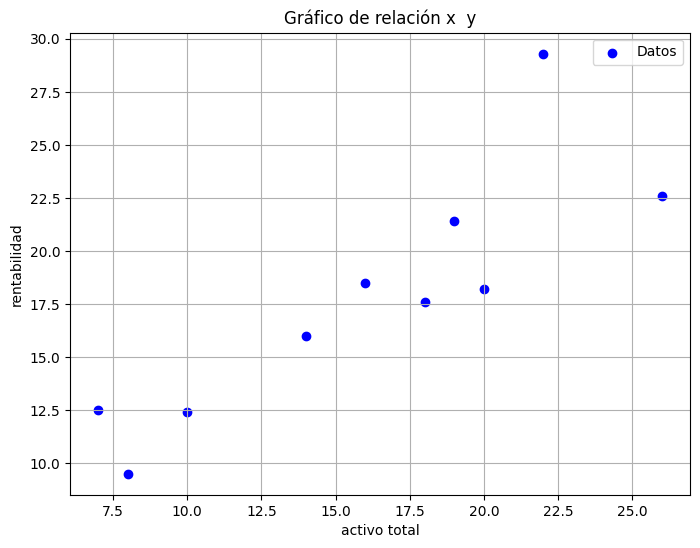

,X,Yi,Yi=B0+B1X,SCR,SCE
0,22,29.3,22.5844,22.8905,45.0993
1,18,17.6,19.3948,2.5434,3.2213
2,14,16.0,16.2052,2.5434,0.0421
3,8,9.5,11.4208,40.6942,3.6895
4,26,22.6,25.7740,63.5847,10.0743
5,10,12.4,13.0156,22.8905,0.3790
6,16,18.5,17.8000,0.0000,0.4900
7,19,21.4,20.1922,5.7226,1.4588
8,20,18.2,20.9896,10.1735,7.7819
9,7,12.5,10.6234,51.5036,3.5216


Media Yi= 17.8

SCT = 222.5464 + 75.7578  = 298.304


,GL,SC,CM,FC,FTAB
Regresion,1,222.5464,222.546400,23.5008,5.3177
Residual(Error),8,75.7578,9.469725,0.0000,0.0000
Total,n-1,298.3040,0.000000,0.0000,0.0000


Conlusión: Con un nivel de significancia del 5.0 % se rechaza la Hipotesis nula . Por lo tanto, se concluye que si 
existe relacion lineal entre activo total y rentabilidad


In [3]:
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import f
import math
import pandas as pd

# Datos
#pregunta= "¿Cuánto en Promedio recibirá de propina un moso que se ha demorado en atender 3.5 minutos?"
#VariableX = 3.5
x = [22,18,14,8,26,10,16,19,20,7]
TextX = "activo total"
y = [29.3,17.6,16,9.5,22.6,12.4,18.5,21.4,18.2,12.5]
TextY = "rentabilidad"
a = 0.05
n = len(x)

#------------------------------------------------
# Creacion y muestra en pantalla del grafico
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Datos')
# Personalizar el gráfico
plt.title('Gráfico de relación x  y')
plt.xlabel(TextX)
plt.ylabel(TextY)
plt.grid(True)
plt.legend()
# Mostrar el gráfico
plt.show()
#-----------------------------------------------

# Calculo x*y | x^2 | y^2
xy=[]
x2=[]
y2=[]
for posC,numero in enumerate(x):
    valorXY = numero*y[posC]
    valorX2 = numero**2
    valorY2 = y[posC]**2
    xy.append(valorXY)
    x2.append(valorX2)
    y2.append(valorY2)

# CALCULO DE COEFICIENTES PRACTICO
# PASO 1.
NuB1 = (n*sum(xy))-(sum(x)*sum(y))
DeNB1 = (n*sum(x2))-(sum(x)**2)
B1 = round(NuB1/DeNB1,4)
#print("\nPASO 1\nB1 =",NuB1,"/",DeNB1," =",B1)

# PASO 2.
NuB0 = (sum(y)-B1*sum(x))
B0 = round(NuB0/n,4)
#print("\nPASO 2\nB0 =",NuB0,"/",n," =",B0)

# Calculamos Y=B0+B1X
yBoB1X = []
for posC,numero in enumerate(x):
    valor = round(B0+B1*numero,4)
    yBoB1X.append(valor)
promedioyBoB1X = sum(yBoB1X)/n

# Calculamos SCR
Scr = []
for posC,numero in enumerate(yBoB1X):
    valor = round((numero-promedioyBoB1X)**2,4)
    Scr.append(valor)

# Calculamos SCE
Sce = []
for posC,numero in enumerate(yBoB1X):
    valor = round((numero-y[posC])**2,4)
    Sce.append(valor)

# Crear un DataFrame 
Tabla1 = {
    'X': x+[sum(x)],
    'Yi': y+[sum(y)],
    'Yi=B0+B1X': yBoB1X+[sum(yBoB1X)],
    'SCR': Scr+[sum(Scr)],   
    'SCE': Sce+[sum(Sce)]  
}
df = pd.DataFrame(Tabla1)
df = df.rename(index={10:'TOTAL'})

# Mostrar el DataFrame
display(df)

# Calculamos SCT
Sct = round(sum(Scr)+sum(Sce),3)

print("Media Yi=",promedioyBoB1X)
print("\nSCT =",sum(Scr),"+",sum(Sce)," =",Sct)

# ------------------Cuadro ANOVA------------------------
ResidualEror = n-2
cmREror = sum(Sce)/ResidualEror
Fc = round((sum(Scr)/1)/(sum(Sce)/(n-2)),4)
Ft = round(f.ppf(1-a,1,n-2),4)

Anova = {
    'GL': [1,ResidualEror,'n-1'],
    'SC': [sum(Scr), sum(Sce),Sct],
    'CM': [sum(Scr), cmREror, 0],  
    'FC': [Fc, 0, 0],   
    'FTAB': [Ft, 0, 0]  
}
tablaAnova = pd.DataFrame(Anova, index=['Regresion', 'Residual(Error)', 'Total'])
# Mostrar el DataFrame
display(tablaAnova)

# Conclusion
conclusion=""
sn = ""
if Fc>Ft:
    conclusion="se rechaza la Hipotesis nula"
    sn="si"
else:
    conclusion="se acepta la Hipotesis nula"
    sn = "no"
    
print("Conlusión: Con un nivel de significancia del",a*100,"%",conclusion,". Por lo tanto, se concluye que",sn,"\nexiste relacion lineal entre",TextX,"y",TextY)



# Ejercicio 2:
Calcular la varianza residual con los datos del ejercicio anterior.

![s8Ej1](../Images/S8EJ1.png)

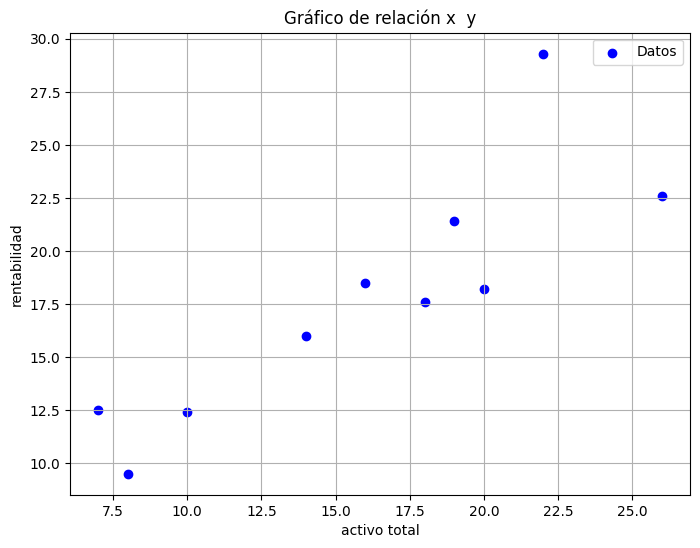

,X,Yi,Yi=B0+B1X,e_i
0,22,29.3,22.5844,6.7156
1,18,17.6,19.3948,-1.7948
2,14,16.0,16.2052,-0.2052
3,8,9.5,11.4208,-1.9208
4,26,22.6,25.7740,-3.1740
5,10,12.4,13.0156,-0.6156
6,16,18.5,17.8000,0.7000
7,19,21.4,20.1922,1.2078
8,20,18.2,20.9896,-2.7896
9,7,12.5,10.6234,1.8766


Ecuacion de Pronostico
Y = 5.0416 + 0.7974 X

Varianza Residual (S^2_r) = 75.7577 / 10 - 2 = 9.4697


In [4]:
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import f
import math
import pandas as pd

# Datos
#pregunta= "¿Cuánto en Promedio recibirá de propina un moso que se ha demorado en atender 3.5 minutos?"
#VariableX = 3.5
x = [22,18,14,8,26,10,16,19,20,7]
TextX = "activo total"
y = [29.3,17.6,16,9.5,22.6,12.4,18.5,21.4,18.2,12.5]
TextY = "rentabilidad"
a = 0.05
n = len(x)

#------------------------------------------------
# Creacion y muestra en pantalla del grafico
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Datos')
# Personalizar el gráfico
plt.title('Gráfico de relación x  y')
plt.xlabel(TextX)
plt.ylabel(TextY)
plt.grid(True)
plt.legend()
# Mostrar el gráfico
plt.show()
#-----------------------------------------------

# Calculo x*y | x^2 | y^2
xy=[]
x2=[]
y2=[]
for posC,numero in enumerate(x):
    valorXY = numero*y[posC]
    valorX2 = numero**2
    valorY2 = y[posC]**2
    xy.append(valorXY)
    x2.append(valorX2)
    y2.append(valorY2)

# CALCULO DE COEFICIENTES PRACTICO
# PASO 1.
NuB1 = (n*sum(xy))-(sum(x)*sum(y))
DeNB1 = (n*sum(x2))-(sum(x)**2)
B1 = round(NuB1/DeNB1,4)
#print("\nPASO 1\nB1 =",NuB1,"/",DeNB1," =",B1)

# PASO 2.
NuB0 = (sum(y)-B1*sum(x))
B0 = round(NuB0/n,4)
#print("\nPASO 2\nB0 =",NuB0,"/",n," =",B0)

# Calculamos Y=B0+B1X
yBoB1X = []
for posC,numero in enumerate(x):
    valor = round(B0+B1*numero,4)
    yBoB1X.append(valor)
promedioyBoB1X = sum(yBoB1X)/n

# Calculamos ei
e_i=[]
sumaEi=0
sumaEi2=0
for posC,numero in enumerate(y):
    valor1 = numero - yBoB1X[posC]
    e_i.append(round(valor1,4))
    sumaEi += abs(valor1)
    sumaEi2 += abs(valor1)**2

# Calculo S_r^2
S2r = round(sumaEi2/(n-2),4)

# Crear un DataFrame
Tabla1 = {
    'X': x+[sum(x)],
    'Yi': y+[sum(y)],
    'Yi=B0+B1X': yBoB1X+[sum(yBoB1X)],
    'e_i': e_i+[sumaEi],   
}
df = pd.DataFrame(Tabla1)
df = df.rename(index={10:'TOTAL'})
# Mostrar el DataFrame
display(df)

print("Ecuacion de Pronostico\nY =",B0,"+",B1,"X")
print("\nVarianza Residual (S^2_r) =",round(sumaEi2,4),"/",n,"- 2 =",S2r)


# Ejercicio2 Coeficiente de Determinacion

![S8Ej3](../Images/S8Ej3.png)

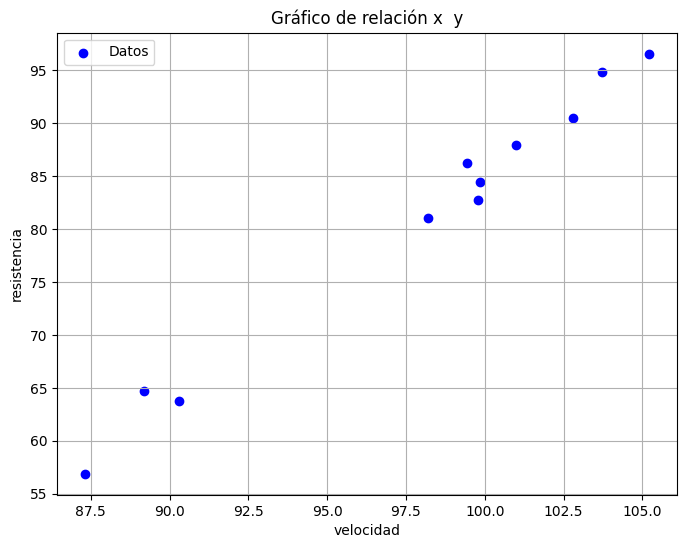

,X,Y,Y*X,X^2,Y^2
0,90.31,63.79,5760.8749,265.0494,0.6540
1,87.32,56.90,4968.5080,515.3915,1.6302
2,99.77,82.76,8256.9652,16.3043,4.6522
3,99.86,84.48,8436.1728,17.9027,0.3972
4,99.42,86.21,8570.9982,10.7989,4.1812
5,100.98,87.93,8879.1714,44.0453,0.1716
6,102.81,90.50,9304.3050,111.6649,0.8953
7,103.73,94.83,9836.7159,157.3310,1.9819
8,105.20,96.55,10157.0600,246.5046,0.0009
9,89.18,64.69,5769.0542,349.9644,6.3418



Coeficiente de Correlacion (r) = 0.994

PASO 1
B1 = 8887.841600000043 / 4138.2021999999415  = 2.1478

PASO 2
B0 = -1423.059562 / 11  = -129.3691

Ecuacion de Pronostico
Y = -129.3691 + 2.1478 X


,Yi=B0+B1X,SCR,SCE
0,64.5987,265.0494,0.6540
1,58.1768,515.3915,1.6302
2,84.9169,16.3043,4.6522
3,85.1102,17.9027,0.3972
4,84.1652,10.7989,4.1812
5,87.5157,44.0453,0.1716
6,91.4462,111.6649,0.8953
7,93.4222,157.3310,1.9819
8,96.5795,246.5046,0.0009
9,62.1717,349.9644,6.3418



SCT = 1735.4293 + 21.1939  = 1756.6232

Coeficiente de Determinacion (r^2):
 1735.43 / 1756.62 = 0.9879 -> 98.79 %


In [14]:
import matplotlib.pyplot as plt
import math

# Datos
#pregunta= "¿Cuánto en Promedio recibirá de propina un moso que se ha demorado en atender 3.5 minutos?"
#VariableX = 3.5
x = [90.31,87.32,99.77,99.86,99.42,100.98,102.81,103.73,105.2,89.18,98.21]
TextX = "velocidad"
y = [63.79,56.9,82.76,84.48,86.21,87.93,90.5,94.83,96.55,64.69,81.03]
TextY = "resistencia"
n = len(x)

#------------------------------------------------
# Creacion y muestra en pantalla del grafico
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Datos')
# Personalizar el gráfico
plt.title('Gráfico de relación x  y')
plt.xlabel(TextX)
plt.ylabel(TextY)
plt.grid(True)
plt.legend()
# Mostrar el gráfico
plt.show()
#-----------------------------------------------

# Calculo x*y | x^2 | y^2
xy=[]
x2=[]
y2=[]
for posC,numero in enumerate(x):
    valorXY = numero*y[posC]
    valorX2 = numero**2
    valorY2 = y[posC]**2
    xy.append(valorXY)
    x2.append(valorX2)
    y2.append(valorY2)

# Crear un DataFrame 
Tabla1 = {
    'X': x+[sum(x)],
    'Y': y+[sum(y)],
    'Y*X': xy+[sum(xy)],
    'X^2': Scr+[sum(x2)],   
    'Y^2': Sce+[sum(y2)]  
}
df = pd.DataFrame(Tabla1)
df = df.rename(index={n:'TOTAL'})
# Mostrar el DataFrame
display(df)

# Calculo de coeficiente de Correlacion
r = round((n * sum(xy) - sum(x) * sum(y)) / (math.sqrt(n * sum(x2) - (sum(x) ** 2)) * math.sqrt(n * sum(y2) - (sum(y) ** 2))),3)
print("\nCoeficiente de Correlacion (r) =", r)
#-----------------------------------------------------------------
# Calculo de coeficiente de Determinacion -> Solo aplica para Regresion Lineal Simple
# CfD = round(r**2,4)
# print("Coeficiente de Determinacion Forma Simple =",CfD," ->",CfD*100,"%")
#----------------------------------------------------------
# Calculo de coeficiente de Determinacion -> Como debe de ser

# CALCULO DE COEFICIENTES PRACTICO
# PASO 1.
NuB1 = (n*sum(xy))-(sum(x)*sum(y))
DeNB1 = (n*sum(x2))-(sum(x)**2)
B1 = round(NuB1/DeNB1,4)
print("\nPASO 1\nB1 =",NuB1,"/",DeNB1," =",B1)

# PASO 2.
NuB0 = (sum(y)-B1*sum(x))
B0 = round(NuB0/n,4)
print("\nPASO 2\nB0 =",NuB0,"/",n," =",B0)

# Ecuacion de Pronostico:
print("\nEcuacion de Pronostico\nY =",B0,"+",B1,"X")

# Calculamos Y=B0+B1X
yBoB1X = []
for posC,numero in enumerate(x):
    valor = round(B0+B1*numero,4)
    yBoB1X.append(valor)
promedioyBoB1X = sum(yBoB1X)/n

# Calculamos SCR
Scr = []
for posC,numero in enumerate(yBoB1X):
    valor = round((numero-promedioyBoB1X)**2,4)
    Scr.append(valor)

# Calculamos SCE
Sce = []
for posC,numero in enumerate(yBoB1X):
    valor = round((numero-y[posC])**2,4)
    Sce.append(valor)

# Crear un DataFrame 
Tabla2 = {
    'Yi=B0+B1X': yBoB1X+[sum(yBoB1X)],
    'SCR': Scr+[sum(Scr)],   
    'SCE': Sce+[sum(Sce)]  
}
tb2 = pd.DataFrame(Tabla2)
tb2 = tb2.rename(index={n:'TOTAL'})
# Mostrar el DataFrame
display(tb2)

# Calculamos SCT
Sct = round(sum(Scr)+sum(Sce),4)
print("\nSCT =",sum(Scr),"+",sum(Sce)," =",Sct)

# Calculamos R^2
r2 = sum(Scr)/Sct
print("\nCoeficiente de Determinacion (r^2):\n",round(sum(Scr),2),"/",round(Sct,2),"=",round(r2,4),"->",round(r2,4)*100,"%")



# Ejercicio 4 - Regresion Lineal Multiple
Se ha reunido la siguiente información de una muestra aleatoria de arrendadores de departamentos en una ciudad. Se intenta predecir la renta (en dólares por mes) con base en el tamaño del departamento (número de habitaciones) y la distancia al centro de la ciudad (en millas).

![S8Ej5](../Images/S8Ej5.png)

a) Determinar la ecuación de regresión estimada

b) Interpretar cada uno de los coeficientes

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import math

# Datos
y = [360,1000,450,525,350,300]
X1 = [2,6,3,4,2,1]
X2 = [1,1,2,3,10,4]
n = len(y)

# Calculo de Sumas X1/X2/Y/X1*Y/X2*Y/X1*X2/X1^2/X2^2
X1xY=[]
X2xY=[]
X1xX2=[]
X1_2 = []
X2_2 = []
for posC,numero in enumerate(y):
    valorX1xY = X1[posC]*numero
    valorX2xY = X2[posC]*numero
    valorX1xX2 = X1[posC]*X2[posC]
    valorX1_2 = X1[posC]**2
    valorX2_2 = X2[posC]**2
    X1xY.append(valorX1xY)
    X2xY.append(valorX2xY)
    X1xX2.append(valorX1xX2)
    X1_2.append(valorX1_2)
    X2_2.append(valorX2_2)

# Crear una Tabla 
Tabla1 = {
    'X1': X1+[sum(X1)],
    'X2': X2+[sum(X2)],   
    'Y': y+[sum(y)],
    'X1*Y': X1xY+[sum(X1xY)],
    'X2*Y': X2xY+[sum(X2xY)],
    'X1*X2': X1xX2+[sum(X1xX2)],
    'X1^2': X1_2+[sum(X1_2)],
    'X2^2': X2_2+[sum(X2_2)] 
}
tb1 = pd.DataFrame(Tabla1)
tb1 = tb1.rename(index={n:'SUMA'})
# Mostrar el DataFrame
display(tb1)

# Definir una matriz
matriz = np.array([[  n,     sum(X1),    sum(X2)],
                   [sum(X1),sum(X1_2),sum(X1xX2)],
                   [sum(X2),sum(X1xX2),sum(X2_2)]])

# Definir la segunda matriz (3x1)
matriz_3x1 = np.array([[sum( y )],
                       [sum(X1xY)],
                       [sum(X2xY)]])

# Calcular la inversa de la matriz
matriz_inversa = np.linalg.inv(matriz)

# Calcular el producto de matrices
producto = np.dot(matriz_inversa,matriz_3x1)

print("Matriz:")
print(matriz)
print("\nMatriz inversa:")
print(matriz_inversa)

print("\nMatriz 3x1:")
print(matriz_3x1)
print("\nProducto de matrices:")
print(producto)

print("\nY = ",producto[0][0],"+",producto[1][0],"+",producto[2][0])



,X1,X2,Y,X1*Y,X2*Y,X1*X2,X1^2,X2^2
0,2,1,360,720,360,2,4,1
1,6,1,1000,6000,1000,6,36,1
2,3,2,450,1350,900,6,9,4
3,4,3,525,2100,1575,12,16,9
4,2,10,350,700,3500,20,4,100
5,1,4,300,300,1200,4,1,16
SUMA,18,21,2985,11170,8535,50,70,131


Matriz:
[[  6  18  21]
 [ 18  70  50]
 [ 21  50 131]]

Matriz inversa:
[[ 1.48024856 -0.29027963 -0.126498  ]
 [-0.29027963  0.07656458  0.01731025]
 [-0.126498    0.01731025  0.02130493]]

Matriz 3x1:
[[ 2985]
 [11170]
 [ 8535]]

Producto de matrices:
[[ 96.45805593]
 [136.48468708]
 [ -2.40346205]]

Y =  96.4580559254333 + 136.48468708388813 + -2.403462050599179


Interpretacion:
* $\beta_0$: La renta esperada(promedio), cuando el tamaño del departamento y distancia al centro de la ciudad toman el valor de cero será de 96.481$
* $\beta_1$: Por cada incremento de una habitación, la renta esperada(promedio) incrementará en 136.485$ manteniendo constante la distancia al centro de ciudad.
* $\beta_2$: Por cada incremento de una unidad de distancia al centro de la ciudad,la renta esperada (promedio) disminuirá en -2,401$ manteniendo constante wl número de habitaciónes.

# Ejercicio 5 - Regresion Lineal multiple - Con Coefeiciente de Determinacion

Un Ingeniero Industrial desea comprobar si la resistencia a la tensión de una fibra se ve afectada por el tiempo de secado, la temperatura de secado y el porcentaje de algodón en la fibra. Para lo cual recoge la información de una muestra de 11 productos. En la siguiente tabla se muestran los datos:

![S8Ej5](../Images/S8Ejc6.png)

Determine el modelo de regresion estimado y halle el coeficiente de determinacion del modelo:

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import math

# Datos
a = 0.05 # -> General
y = [213,220,216,234,230,235,238,230,236,231,243]
X1 = [2,2.3,2.3,2.5,3,3.4,3.4,3.4,4,4,4.1]
X2 = [13,15,15,18,20,19,19,19,16,16,17]
n = len(y)

# Calculo de Sumas X1/X2/Y/X1*Y/X2*Y/X1*X2/X1^2/X2^2
X1xY=[]
X2xY=[]
X1xX2=[]
X1_2 = []
X2_2 = []
for posC,numero in enumerate(y):
    valorX1xY = X1[posC]*numero
    valorX2xY = X2[posC]*numero
    valorX1xX2 = X1[posC]*X2[posC]
    valorX1_2 = X1[posC]**2
    valorX2_2 = X2[posC]**2
    X1xY.append(valorX1xY)
    X2xY.append(valorX2xY)
    X1xX2.append(valorX1xX2)
    X1_2.append(valorX1_2)
    X2_2.append(valorX2_2)

# ---------Crear una Tabla------------ 
Tabla1 = {
    'X1': X1+[sum(X1)],
    'X2': X2+[sum(X2)],   
    'Y': y+[sum(y)],
    'X1*Y': X1xY+[sum(X1xY)],
    'X2*Y': X2xY+[sum(X2xY)],
    'X1*X2': X1xX2+[sum(X1xX2)],
    'X1^2': X1_2+[sum(X1_2)],
    'X2^2': X2_2+[sum(X2_2)] 
}
tb1 = pd.DataFrame(Tabla1)
tb1 = tb1.rename(index={n:'SUMA'})
# ---------Mostrar el DataFrame-----
display(tb1)

# Definir una matriz
matriz = np.array([[  n,     sum(X1),    sum(X2)],
                   [sum(X1),sum(X1_2),sum(X1xX2)],
                   [sum(X2),sum(X1xX2),sum(X2_2)]])

# Definir la segunda matriz (3x1)
matriz_3x1 = np.array([[sum( y )],
                       [sum(X1xY)],
                       [sum(X2xY)]])

# Calcular la inversa de la matriz
matriz_inversa = np.linalg.inv(matriz)

# Calcular el producto de matrices
producto = np.dot(matriz_inversa,matriz_3x1)

print("Matriz:")
print(matriz)
print("\nMatriz inversa:")
print(matriz_inversa)

print("\nMatriz 3x1:")
print(matriz_3x1)
print("\nProducto de matrices:")
print(producto)

# Asignando Variables
B0 = producto[0][0]
B1 = producto[1][0]
B2 = producto[2][0]
print("\nModelo de Regresion Estimado")
print("Y = ",B0,"+",B1,"X1 +",B2,"X2")

# Calculamos Y=B0+B1X
yBoB1X = []
for posC,numero in enumerate(X1):
    valor = round(B0+B1*numero+B2*X2[posC],4)
    yBoB1X.append(valor)
promedioyBoB1X = sum(yBoB1X)/n

# Calculamos SCR
Scr = []
for posC,numero in enumerate(yBoB1X):
    valor = round((numero-promedioyBoB1X)**2,4)
    Scr.append(valor)

# Calculamos SCE
Sce = []
for posC,numero in enumerate(yBoB1X):
    valor = round((numero-y[posC])**2,4)
    Sce.append(valor)

# Crear un DataFrame 
Tabla2 = {
    'Yi=B0+B1X': yBoB1X+[sum(yBoB1X)],
    'SCR': Scr+[sum(Scr)],   
    'SCE': Sce+[sum(Sce)]  
}
tb2 = pd.DataFrame(Tabla2)
tb2 = tb2.rename(index={n:'TOTAL'})
# Mostrar el DataFrame
display(tb2)

# Calculamos SCT
Sct = round(sum(Scr)+sum(Sce),4)
# print("\nSCT =",sum(Scr),"+",sum(Sce)," =",Sct)

# ------------------Cuadro ANOVA------------------------
ResidualEror = n-2
cmREror = sum(Sce)/ResidualEror
Fc = round((sum(Scr)/1)/(sum(Sce)/(n-2)),4)
Ft = round(f.ppf(1-a,1,n-2),4)

Anova = {
    'GL': [1,ResidualEror,'n-1'],
    'SC': [sum(Scr), sum(Sce),Sct],
    'CM': [sum(Scr), cmREror, 0],  
    'FC': [Fc, 0, 0],   
    'FTAB': [Ft, 0, 0]  
}
tablaAnova = pd.DataFrame(Anova, index=['Regresion', 'Residual(Error)', 'Total'])
# Mostrar el DataFrame
display(tablaAnova)

# Calculamos R^2
r2 = sum(Scr)/Sct
print("\nCoeficiente de Determinacion (r^2):\n",round(sum(Scr),2),"/",round(Sct,2),"=",round(r2,4),"->",round(r2,4)*100,"%")
print("El 81.1% de la variabilidad de la variable Resistencia es explicado por el modelo de regresión ajustado")


,X1,X2,Y,X1*Y,X2*Y,X1*X2,X1^2,X2^2
0,2.0,13,213,426.0,2769,26.0,4.00,169
1,2.3,15,220,506.0,3300,34.5,5.29,225
2,2.3,15,216,496.8,3240,34.5,5.29,225
3,2.5,18,234,585.0,4212,45.0,6.25,324
4,3.0,20,230,690.0,4600,60.0,9.00,400
5,3.4,19,235,799.0,4465,64.6,11.56,361
6,3.4,19,238,809.2,4522,64.6,11.56,361
7,3.4,19,230,782.0,4370,64.6,11.56,361
8,4.0,16,236,944.0,3776,64.0,16.00,256
9,4.0,16,231,924.0,3696,64.0,16.00,256


Matriz:
[[  11.     34.4   187.  ]
 [  34.4   113.32  591.5 ]
 [ 187.    591.5  3227.  ]]

Matriz inversa:
[[ 6.23013212 -0.1569414  -0.33226026]
 [-0.1569414   0.20804684 -0.02903987]
 [-0.33226026 -0.02903987  0.02488682]]

Matriz 3x1:
[[ 2526. ]
 [ 7958.3]
 [43081. ]]

Producto de matrices:
[[174.22260618]
 [  8.19850348]
 [  1.75145889]]

Modelo de Regresion Estimado
Y =  174.22260618072784 + 8.198503481238646 X1 + 1.7514588890769587 X2


,Yi=B0+B1X,SCR,SCE
0,213.3886,263.9895,0.1510
1,219.3510,105.7885,0.4212
2,219.3510,105.7885,11.2292
3,226.2451,11.5006,60.1385
4,233.8473,17.7321,14.8017
5,235.3752,32.9343,0.1408
6,235.3752,32.9343,6.8896
7,235.3752,32.9343,28.8928
8,235.0400,29.1994,0.9216
9,235.0400,29.1994,16.3216


,GL,SC,CM,FC,FTAB
Regresion,1,725.6007,725.600700,38.6538,5.1174
Residual(Error),9,168.9461,18.771789,0.0000,0.0000
Total,n-1,894.5468,0.000000,0.0000,0.0000



Coeficiente de Determinacion (r^2):
 725.6 / 894.55 = 0.8111 -> 81.11 %
El 81.1% de la variabilidad de la variable Resistencia es explicado por el modelo de regresión ajustado
